In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(1)

data = pd.read_csv("data/train.csv")

In [2]:
data = np.array(data)

# m = number of examples
# n = number of pixels from example
m, n = data.shape

np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1: n] 
X_dev = X_dev / 255.

data_train = data[1000: m].T
Y_train = data_train[0]
X_train = data_train[1: n] 
X_train = X_train / 255.
_,m_train = X_train.shape


In [3]:
Y_train

array([5, 7, 0, ..., 2, 1, 1], dtype=int64)

In [4]:
def init_params():
    amount_of_neurons = 10
    input_of_neurons = 784
    
    W1 = np.random.rand(10, 784) - 0.5  
    b1 = np.random.rand(10, 1) - 0.5 

    #The input will be the output from the previous 
    W2 = np.random.rand(10, 10) - 0.5  
    b2 = np.random.rand(10, 1) - 0.5 

    return W1, b1, W2, b2

In [5]:
def ReLU(Z):
    #return 1 if Z > 0 else 0
    return np.maximum(Z, 0) # Return 0 if values is lower than 0, and 1 if it is greater

def derivative_ReLU(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [6]:
def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)

    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

In [7]:
#check what number it is
def one_hot(Y):
    # Y.size = number of examples
    # Y.max() + 1 = number of helper classes, going from 0 to 10
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    #go to each row especified in Y and set its value to 1
    one_hot_Y[np.arange(Y.size), Y] = 1
    
    return (one_hot_Y.T)


def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * derivative_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    
    return dW1, db1, dW2, db2


In [8]:
def update_params(W1, b1, W2, b2 ,dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2

In [9]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()

    for i in range(iterations+1):
        
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))

    return W1, b1, W2, b2

In [10]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[7 3 7 ... 3 5 5] [5 7 0 ... 2 1 1]
0.042731707317073174
Iteration:  10
[9 9 9 ... 3 9 1] [5 7 0 ... 2 1 1]
0.1426341463414634
Iteration:  20
[9 9 9 ... 1 3 1] [5 7 0 ... 2 1 1]
0.19875609756097562
Iteration:  30
[5 9 9 ... 1 1 1] [5 7 0 ... 2 1 1]
0.22882926829268294
Iteration:  40
[5 9 9 ... 1 1 1] [5 7 0 ... 2 1 1]
0.26326829268292684
Iteration:  50
[5 9 0 ... 2 1 1] [5 7 0 ... 2 1 1]
0.3622682926829268
Iteration:  60
[5 9 0 ... 2 1 1] [5 7 0 ... 2 1 1]
0.4005365853658537
Iteration:  70
[3 0 0 ... 2 1 1] [5 7 0 ... 2 1 1]
0.42234146341463413
Iteration:  80
[3 0 0 ... 2 1 1] [5 7 0 ... 2 1 1]
0.4447560975609756
Iteration:  90
[3 0 0 ... 2 1 1] [5 7 0 ... 2 1 1]
0.4684878048780488
Iteration:  100
[5 0 0 ... 2 1 1] [5 7 0 ... 2 1 1]
0.491390243902439
Iteration:  110
[5 0 0 ... 2 1 1] [5 7 0 ... 2 1 1]
0.5121707317073171
Iteration:  120
[5 0 0 ... 2 7 1] [5 7 0 ... 2 1 1]
0.5310243902439025
Iteration:  130
[5 0 0 ... 2 7 1] [5 7 0 ... 2 1 1]
0.5494878048780488
Iteration:  

In [11]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  8


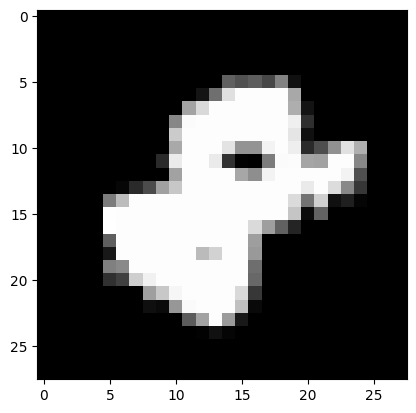

In [16]:
test_prediction(2003, W1, b1, W2, b2)

In [13]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 5 2 8 4 4 0 4 4 8 7 2 8 2 9 4 8 8 1 1 5 2 5 6 7 5 2 1 9 2 2 3 2 6 5 6 1
 0 0 9 6 1 0 4 0 2 3 4 4 0 9 2 8 1 7 5 3 4 9 6 5 2 2 3 8 5 2 6 8 2 1 1 8 7
 5 0 1 8 3 8 0 7 3 5 9 1 1 7 4 2 9 3 7 2 1 1 7 4 3 4 8 9 9 9 4 7 5 0 1 8 4
 9 3 8 0 8 3 0 5 5 3 9 1 5 1 4 9 6 3 6 2 2 3 6 8 1 2 2 6 5 5 4 1 6 0 1 8 1
 0 1 9 5 1 3 2 7 4 1 5 6 4 5 9 4 9 2 5 0 1 2 6 9 1 2 9 0 0 5 9 3 9 0 8 4 8
 7 9 1 1 8 9 7 4 7 8 3 0 6 1 1 5 6 1 5 0 0 6 4 3 8 8 7 9 5 3 7 5 0 8 8 7 5
 4 4 7 0 1 8 2 1 0 7 4 5 4 3 8 2 0 1 9 9 5 0 3 9 4 6 8 2 4 3 2 2 8 8 3 0 7
 7 2 4 7 2 3 0 0 2 9 8 1 2 8 6 0 8 2 2 0 0 1 5 8 2 9 2 2 1 1 0 3 1 4 3 0 3
 5 9 2 1 2 4 4 8 5 9 7 2 6 2 5 5 2 2 1 7 4 9 0 3 9 3 6 9 1 0 7 7 2 0 5 0 3
 4 2 5 1 1 0 7 7 5 2 0 0 7 4 0 8 8 5 3 0 4 5 1 4 8 1 5 2 1 0 4 4 4 9 2 1 6
 4 5 1 9 0 0 1 0 0 8 2 0 1 9 8 7 7 8 2 1 9 2 2 8 1 1 1 7 2 4 0 8 9 3 6 9 7
 2 0 9 0 9 5 1 2 2 3 4 1 8 6 0 0 7 4 8 5 8 2 8 8 1 6 1 9 3 4 4 9 9 9 1 2 4
 6 9 9 1 8 8 0 8 3 6 3 8 8 4 2 2 3 9 1 5 2 9 6 8 4 4 9 7 3 9 5 2 1 8 3 2 5
 9 5 6 0 3 6 0 0 9 9 4 9 

0.831